In [ ]:
# Plot multiple internalization vs parameter plots, from multiple solid_all_params.pkl files


In [1]:
import IPython
from tabulate import tabulate

class OrgFormatter(IPython.core.formatters.BaseFormatter):
    def __call__(self, obj):
        try:
            return tabulate(obj, headers='keys',
                            tablefmt='orgtbl', showindex='always')
        except:
            return None

ip = get_ipython()
ip.display_formatter.formatters['text/org'] = OrgFormatter()

import math
import numpy as np
import pandas as pd
import os
import shutil
import subprocess
from subprocess import Popen
import datetime
import matplotlib.pyplot as plt  # plotting
plt.style.use('seaborn-colorblind') # set plot style
plt.cool()                          # heatmap color scheme
%matplotlib inline


import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 



from decimal import Decimal

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
from scipy.stats import binned_statistic_2d

timestep = 0.1

save_figures = 'yes'


In [2]:
working_dir = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/'
report_loc = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/bin/report'


os.chdir(working_dir)
if os.path.isdir('figures') == False:
    os.mkdir('figures')

now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date

output_dirs = []
config_dirs = []

for d in next(os.walk('simulations/'))[1]:
    for f in os.listdir('simulations/'+d):
        if f.endswith('.cym'):
            config_dirs.append(d)
            break
    for sd in next(os.walk('simulations/'+d))[1]:
        if sd.startswith('output') or sd.startswith('run'):
            output_dirs.append(d)
            break

# Sort alphabetically 

indecies = range(len(output_dirs))

output_dirs.sort()
config_dirs.sort()

all_dirs={}

all_dirs['output'] = output_dirs
all_dirs['config'] = config_dirs

all_dirs_df = pd.DataFrame(data = all_dirs)

all_dirs_df


,output,config
0,endocytosis2_sims_output,endocytosis
1,endocytosis_cut_capped_output,endocytosis2_sims
2,endocytosis_cut_output,endocytosis_cut
3,endocytosis_output,endocytosis_cut_capped
4,hip1r_sphere_high_tension_output,hip1r_sphere
5,hip1r_sphere_low_tension_output,hip1r_sphere_high_tension
6,hip1r_sphere_output,hip1r_sphere_low_tension
7,varyArpNb_bindingRate_output,varyArpNb_bindingRate
8,varyCp_Lp1_output,varyCp_Lp
9,varyCp_Lp_output,varyCp_Lp1


In [3]:
# select param values

output_dir_1 = output_dirs[4]
output_dir_2 = output_dirs[5]
output_dir_3 = output_dirs[6]

# config_dirs = [config_dirs[5]]

all_outputs = [output_dir_1, output_dir_2, output_dir_3]

print(output_dir_1, output_dir_2, output_dir_3)
print(str(len(all_outputs)) + ' sets of simulations')

os.chdir(working_dir+'/simulations/')


hip1r_sphere_high_tension_output hip1r_sphere_low_tension_output hip1r_sphere_output
3 sets of simulations


In [4]:
# any specially named prefixes

prefix_1 = '20190515_high_tension_'
prefix_2 = '20190515_low_tension_'
prefix_3 = '20190515_normal_tension_'



In [5]:
# manually input the prefix for now.

param_vary = 'hip1r_coverage'

In [6]:
# load at least config_unique file. right now it's only in the low_tension case.

config_unique_1 = pd.read_pickle(output_dir_1+'/dataframes/'+param_vary+'_config_unique.pkl')

In [7]:
# temp to make config_uique that weren't saved

config_unique_2 = config_unique_1.reset_index()
config_unique_2.rename(index = str, columns = {'param_sweep': 'ps'},inplace = True)
config_unique_2.drop(columns='ps', inplace = True)
config_unique_2['param_sweep']='hip1r_sphere_low_tension_output'
config_unique_2.set_index(['param_sweep', 'run'], inplace = True)

config_unique_3 = config_unique_1.reset_index()
config_unique_3.rename(index = str, columns = {'param_sweep': 'ps'},inplace = True)
config_unique_3.drop(columns='ps', inplace = True)
config_unique_3['param_sweep']='hip1r_sphere_output'
config_unique_3.set_index(['param_sweep', 'run'], inplace = True)

config_unique_3.head()

# config_unique_3['param_sweep']='hip1r_sphere_high_tension_output'
# config_unique_3

hip1r_coverage
param_sweep         run                         
hip1r_sphere_output run0000_0000               1
                    run0000_0001               1
                    run0000_0002               1
                    run0000_0003               1
                    run0000_0004               1

In [8]:
#  import files manually

#  could read the deifferent param here, but not necessary right now. 

# This is mostly a special use case for comparing multipe already-run param variations (saved as dataframes).

#  alternaltively you could load them all into the param_sweep script and set up a new loop at the end. will need to redo a bunch of computation in that case.
#  
# solid_positions = pd.read_pickle(output_dir+'/dataframes/bud_positions.pkl')

# final_bound_hip1r = pd.read_pickle(output_dir+'/dataframes/final_bound_hip1r.pkl')

# # branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_positions_forces_recalibrated.pkl')

# branched_actin_bound_arp  = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r_arp.pkl')

# branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_recalibrated.pkl')


solid_positions_1 = pd.read_pickle(output_dir_1+'/dataframes/'+param_vary+'_solid_allparams.pkl')
solid_positions_2 = pd.read_pickle(output_dir_2+'/dataframes/'+param_vary+'_solid_allparams.pkl')
solid_positions_3 = pd.read_pickle(output_dir_3+'/dataframes/'+param_vary+'_solid_allparams.pkl')

solid_properties_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_solid_propertiess.pkl')
solid_properties_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_solid_propertiess.pkl')
solid_properties_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_solid_propertiess.pkl')

branched_actin_bound_ends_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_hip1r_clusters_ends_recalibrated.pkl')
branched_actin_bound_ends_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_hip1r_clusters_ends_recalibrated.pkl')
branched_actin_bound_ends_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_hip1r_clusters_ends_recalibrated.pkl')

branched_actin_bound_arp_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_associated_arp_allparams.pkl')
branched_actin_bound_arp_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_associated_arp_allparams.pkl')
branched_actin_bound_arp_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_associated_arp_allparams.pkl')

bending_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_branched_actin_bound_ends_bending.pkl')
bending_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_branched_actin_bound_ends_bending.pkl')
bending_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_branched_actin_bound_ends_bending.pkl')

final_hip1r_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_final_bound_hip1r_allparams.pkl')
final_hip1r_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_final_bound_hip1r_allparams.pkl')
final_hip1r_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_final_bound_hip1r_allparams.pkl')

filaments_near_base_1 = pd.read_pickle(output_dir_1+'/dataframes/'+prefix_1+param_vary+'_filaments_near_base.pkl')
filaments_near_base_2 = pd.read_pickle(output_dir_2+'/dataframes/'+prefix_2+param_vary+'_filaments_near_base.pkl')
filaments_near_base_3 = pd.read_pickle(output_dir_3+'/dataframes/'+prefix_3+param_vary+'_filaments_near_base.pkl')


print('all loaded')



all loaded


In [9]:
# temp when all param variations same

config_unique = config_unique_1
solid_properties = solid_properties_1

property_groups = list(config_unique)
solid_property_groups = solid_properties.groupby(property_groups)

groups_run = property_groups+ ['run']
grouped_run = solid_properties.groupby(groups_run)

In [10]:

maxTime=12
print('max time threshold is ' + str(maxTime) + ' s')
# This function determines which runs last > e.g. 12 seconds (if maxTime is 12 seconds).

# if yes, then make new column in grouped_run for mean internalization and 95th percentile of itnernalization,
# taking ONLY the time points up to e.g. time point 12. 

def first_x_timepoints_internalizations(x):
    if x.time[-1]>=maxTime:
#         print('good')
        x['internalization_mean_to_set_time'] = np.mean(x['internalization'].loc[x['time']<=maxTime])
        x['internalization_95thpercentile_to_set_time'] = np.percentile(x['internalization'].loc[x['time']<=maxTime], 95)
    else:
        print('skipping run ' + str(x.name) + ': max time is only ' + str(x.time[-1]))
        x['internalization_mean_to_set_time'] = np.nan
        x['internalization_95thpercentile_to_set_time'] = np.nan        
    return x

# take the solid_properties dataframe and add 'internalization_mean_to_set_time' and 'internalization_95thpercentile_to_set_time'
# ONLY for the runs that run ≥ maxTime. All other set NaN.

solid_properties_1 = solid_properties_1.groupby(groups_run).apply(first_x_timepoints_internalizations)
solid_properties_2 = solid_properties_2.groupby(groups_run).apply(first_x_timepoints_internalizations)
solid_properties_3 = solid_properties_3.groupby(groups_run).apply(first_x_timepoints_internalizations)


max time threshold is 12 s


In [12]:
# set which config groups

# if all the same, just use the first config and solid properties files:

# otherwise will need to set it for each file

config_groups = list(config_unique)

allParams={}

# this works for 1D and 2D I think.
for prop in config_groups:

    params_cur = sorted(list(set(solid_properties[prop])))
    allParams[prop]=params_cur
allParams

{'hip1r_coverage': [1, 10, 20, 40, 60, 80]}

In [13]:
# group by config 

def group_by_config(config_unique, df):

    config_groups = list(config_unique)
    groups = config_groups + ['time']

    
    cur_config = pd.merge(config_unique.reset_index(), df.reset_index(),
                          on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
   
    cur_config_groups = cur_config.groupby(config_groups)
 
    cur_grouped = cur_config.groupby(groups)
    return cur_grouped

# group but not by time

def group_by_config_param_run(config_unique, df):

    cur_config = pd.merge(config_unique.reset_index(), df.reset_index(),
                          on=['param_sweep', 'run'], how='outer').set_index(['param_sweep', 'run'])
   
    cur_grouped_by_config = cur_config.groupby(config_groups)
 

    return cur_grouped_by_config

config_groups

['hip1r_coverage']

In [14]:
# find which column is unique in a 2D array

def find_unique_element(arr):
    unique_per_column=[]
    for i in range(len(arr[0])):
        nbs = [x[i] for x in arr]
        (unique_values,n_unique)=np.unique(nbs, return_counts=True)
        unique_per_column.append(np.max(n_unique))
    column_unique = np.argmin(unique_per_column)
    return column_unique

# go through names

names=[]
for name in allParams:

    names.append(name)
    
param_list_x_any= list(set(config_unique[names[0]]))

# for multi-word param like circle 0.75 at 0.399

# if not string

param_list_x_string = [str(x) for x in param_list_x_any]

# if string

# chek if the param is more than one word
if len(param_list_x_string[0].split())>1:
    # split a multiple word param into individual words
    # split by comma
    word_params=[x.split(',') for x in param_list_x_string]
    # split by space
#     word_params=[x.split(' ') for x in param_list_x_string]  

#     use the function defined above to find the column that changes with every parameter (assuming you split it correctly eg by space versus comma)
    unique_word_index = find_unique_element(word_params)

    # count how many times each word is used for all runs
#     (elements, unique_counts)=np.unique(word_params,return_counts=True)
    # assuming it's just one word changing per param in the param then get the index of most-changed word.
    # could add more words with rank or something. 
#     unique_word_index=np.argmax(unique_counts)
    # pull out just the word that changes the most 
    # separated by comma
    one_word_param=[x.split(',')[unique_word_index] for x in param_list_x_string]
#     separated by space
#     one_word_param=[x.split()[unique_word_index] for x in param_list_x_string]
   
    param_list_x = [float(x) for x in one_word_param]

else:

    param_list_x = [float(x) for x in param_list_x_string]
    # sort numerically.
    param_list_x = np.sort(param_list_x)
print(names[0])
print(param_list_x)

if len(names)>1:

    param_list_y_string= sorted(list(set(config_unique[names[1]])))
    # sort numerically.
    param_list_y = [float(x) for x in param_list_y_string]

    print(names[1])
    print(param_list_y)



hip1r_coverage
[ 1. 10. 20. 40. 60. 80.]


In [46]:
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

def log_10_product_decimal(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
#     for decimal value not integer shown
    return '%.2g' % (x)
    
def plot_means_by_parameter(param_list_current,metric_means,metric_stds,log_criterion,ylabel, color):

    xaxis_log = log_criterion
    x = param_list_current # for now, get from the larger list later
    y = metric_means
    std = metric_stds

    plot_max = np.max(y + std) +20
    plt.rcParams["errorbar.capsize"]=5
    
#     ax = plt.subplot(111)
    ax = fig.add_axes([0.28, 0.2, 0.5, 0.6])

    if xaxis_log == True:
        ax.set_xscale('log')
        import matplotlib.ticker as ticker
        formatter = plt.FuncFormatter(log_10_product_decimal)
        ax.xaxis.set_major_formatter(formatter)
        
    plt.errorbar(x,y,std, fmt='o-', linewidth=3, c=color, alpha=0.9)

    plt.xlabel(config_groups[0])
    plt.ylabel(ylabel)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

In [16]:
idx = pd.IndexSlice
def last_timepoints_count(data_frame, column, config_unique_x):

    data_frame_time_agg = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'count'})

    late_timepoints = data_frame_time_agg.loc[idx[:,:,10:15],:]
    late_timepoints_byconfig = group_by_config_param_run(config_unique_x, late_timepoints)

    late_timepoints_byconfig_mean = late_timepoints_byconfig[column].mean()
    late_timepoints_byconfig_std  = late_timepoints_byconfig[column].std()

    return late_timepoints_byconfig_mean, late_timepoints_byconfig_std

def last_timepoints(data_frame, column, config_unique_x):

    data_frame_time_agg = data_frame.pivot_table(index=['param_sweep','run', 'time'], fill_value = 0, dropna = False, aggfunc={column:'sum'})

    late_timepoints = data_frame_time_agg.loc[idx[:,:,10:15],:]
    late_timepoints_byconfig = group_by_config_param_run(config_unique_x, late_timepoints)

    late_timepoints_byconfig_mean = late_timepoints_byconfig[column].mean()
    late_timepoints_byconfig_std  = late_timepoints_byconfig[column].std()

    return late_timepoints_byconfig_mean, late_timepoints_byconfig_std

In [17]:
def count_grouped_by_run(data_frame,column, config_unique_x):
    # combine with solid to get all time points
    merged = pd.merge(solid_allparams, data_frame, on=['param_sweep','run','time'], how = 'right')
    # count number of 
    data_frame_time_count = merged.pivot_table(index=['param_sweep','run', 'time'], dropna = False, aggfunc={column:'count'})
#     MAX value grouped by run
    data_frame_run_count_max = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column:lambda x: np.nanpercentile(x,95)})
    
    # HERE get perecnetile ananymous function to work on pivot table.
    # data_frame_run_count = data_frame_time_count.pivot_table(index=['param_sweep','run'], dropna = False, aggfunc={column: np.percentile(a, q=95)})

    data_frame_max_count_grouped_mean = group_by_config_param_run(config_unique_x, data_frame_run_count_max)[column].mean()
    data_frame_max_count_grouped_std = group_by_config_param_run(config_unique_x, data_frame_run_count_max)[column].std()
    
    return data_frame_max_count_grouped_mean, data_frame_max_count_grouped_std 



In [18]:

ends_base_last_timept_count_param_mean_1, ends_base_last_timept_count_param_std_1  = last_timepoints(branched_actin_bound_ends_1, 'near_base', config_unique_1)
ends_base_last_timept_count_param_mean_2, ends_base_last_timept_count_param_std_2  = last_timepoints(branched_actin_bound_ends_2, 'near_base', config_unique_2)
ends_base_last_timept_count_param_mean_3, ends_base_last_timept_count_param_std_3  = last_timepoints(branched_actin_bound_ends_3, 'near_base', config_unique_3)

ends_base_last_timept_count_param_mean_3

hip1r_coverage
1      0.063725
10     3.008578
20     8.394608
40    10.311275
60     8.975490
80    12.123775
Name: near_base, dtype: float64

In [19]:

arp_count_param_mean_1, arp_count_param_std_1  = last_timepoints_count(branched_actin_bound_arp_1, 'arp_id', config_unique_1)
arp_count_param_mean_2, arp_count_param_std_2  = last_timepoints_count(branched_actin_bound_arp_2, 'arp_id', config_unique_2)
arp_count_param_mean_3, arp_count_param_std_3  = last_timepoints_count(branched_actin_bound_arp_3, 'arp_id', config_unique_3)

arp_count_param_mean_3

hip1r_coverage
1       7.623529
10     47.773856
20    111.512255
40    121.426471
60    127.437500
80    143.044118
Name: arp_id, dtype: float64

In [20]:
mean_bending_energy_near_base_last_timepoints_1, stdbending_energy_near_base_last_timepoints_1 = last_timepoints(filaments_near_base_1, 'bending_energy', config_unique_1)
mean_bending_energy_near_base_last_timepoints_2, stdbending_energy_near_base_last_timepoints_2 = last_timepoints(filaments_near_base_2, 'bending_energy', config_unique_2)
mean_bending_energy_near_base_last_timepoints_3, stdbending_energy_near_base_last_timepoints_3 = last_timepoints(filaments_near_base_3, 'bending_energy', config_unique_3)

mean_bending_energy_near_base_last_timepoints_2.tail()



hip1r_coverage
10     7.541697
20    32.100135
40    40.022857
60    32.236931
80    47.351954
Name: bending_energy, dtype: float64

In [22]:
# number of filaments per condition in branched actin hip1R-bound network 
filament_nb_last_timept_count_param_mean_1, filament_nb_last_timept_count_param_std_1  = last_timepoints_count(branched_actin_bound_ends_1, 'plus_state', config_unique_1)
filament_nb_last_timept_count_param_mean_2, filament_nb_last_timept_count_param_std_2  = last_timepoints_count(branched_actin_bound_ends_2, 'plus_state', config_unique_2)
filament_nb_last_timept_count_param_mean_3, filament_nb_last_timept_count_param_std_3  = last_timepoints_count(branched_actin_bound_ends_3, 'plus_state', config_unique_3)

filament_nb_last_timept_count_param_mean_3

hip1r_coverage
1       3.569853
10     47.466912
20    114.275735
40    124.340686
60    130.811275
80    145.906863
Name: plus_state, dtype: float64

In [23]:
# c1 = 'orangered'
# c2 = 'darkcyan'
# c3 = 'goldenrod'

# high, low, medium

c1 = 'C2'
c2 = 'C0'
c3 = 'C1'


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


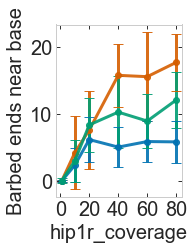

In [47]:

fig = plt.figure(figsize=[3.5,4])     
# ax = fig.add_axes([0.28, 0.2, 0.3, 0.6])
plot_means_by_parameter(param_list_x, ends_base_last_timept_count_param_mean_1, ends_base_last_timept_count_param_std_1, False,'Barbed ends near base', c1 )
plot_means_by_parameter(param_list_x, ends_base_last_timept_count_param_mean_2, ends_base_last_timept_count_param_std_2, False,'Barbed ends near base', c2 )
plot_means_by_parameter(param_list_x, ends_base_last_timept_count_param_mean_3, ends_base_last_timept_count_param_std_3, False,'Barbed ends near base', c3 )
plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 45])


# plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_last_timepts_vs_' +config_groups[0]+ '_sweep.png')
    plt.savefig(working_dir+'figures/'+pref+'_Ends_near_base_last_timepts_vs_' +config_groups[0]+ '_sweep.pdf')
    

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: Thi

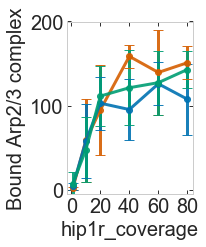

In [48]:

fig = plt.figure(figsize=[3.5,4])     
plot_means_by_parameter(param_list_x, arp_count_param_mean_1, arp_count_param_std_1, False,'Bound Arp2/3 complex', c1 )
plot_means_by_parameter(param_list_x, arp_count_param_mean_2, arp_count_param_std_2, False,'Bound Arp2/3 complex', c2 )
plot_means_by_parameter(param_list_x, arp_count_param_mean_3, arp_count_param_std_3, False,'Bound Arp2/3 complex', c3 )
plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-5, 200])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_Bound_arp_vs_' +config_groups[0]+ '_sweep.png')
    plt.savefig(working_dir+'figures/'+pref+'_Bound_arp_vs_' +config_groups[0]+ '_sweep.pdf')
    

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: Thi

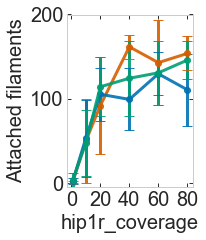

In [52]:

fig = plt.figure(figsize=[3.5,4])     

plot_means_by_parameter(param_list_x, filament_nb_last_timept_count_param_mean_1, filament_nb_last_timept_count_param_std_1, False,'Attached filaments', c1 )
plot_means_by_parameter(param_list_x, filament_nb_last_timept_count_param_mean_2, filament_nb_last_timept_count_param_std_2, False,'Attached filaments', c2 )
plot_means_by_parameter(param_list_x, filament_nb_last_timept_count_param_mean_3, filament_nb_last_timept_count_param_std_3, False,'Attached filaments', c3 )
plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
plt.ylim([-5, 200])

plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_filament_nb_last_timepts_vs_' +config_groups[0]+ '_sweep.png')
    plt.savefig(working_dir+'figures/'+pref+'_filament_nb_last_timepts_vs_' +config_groups[0]+ '_sweep.pdf')
    

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: Thi

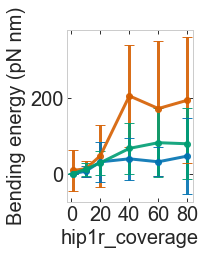

In [50]:

fig = plt.figure(figsize=[3.5,4])     
plot_means_by_parameter(param_list_x, mean_bending_energy_near_base_last_timepoints_1, stdbending_energy_near_base_last_timepoints_1, False,'Bending energy (pN nm)', c1 )
plot_means_by_parameter(param_list_x, mean_bending_energy_near_base_last_timepoints_2, stdbending_energy_near_base_last_timepoints_2, False,'Bending energy (pN nm)', c2 )
plot_means_by_parameter(param_list_x, mean_bending_energy_near_base_last_timepoints_3, stdbending_energy_near_base_last_timepoints_3, False,'Bending energy (pN nm)', c3 )
plt.xticks([0,20,40,60,80])
# plt.xticks([0.01, 0.1,1,10])
# plt.ylim([-5, 45])


plt.tight_layout()
if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_bending_energy_near_base_last_timepts_vs_' +config_groups[0]+ '_sweep.png')
    plt.savefig(working_dir+'figures/'+pref+'_bending_energy_near_base_last_timepts_vs_' +config_groups[0]+ '_Sweep.pdf')
    

In [ ]:
mean_bending_energy_last_timepoints, stdbending_energy_last_timepoints  = last_timepoints(branched_actin_bound_ends_bending, 'bending_energy')




In [ ]:
arp_bound_max_count_param_mean, arp_bound_max_count_param_std = count_grouped_by_run(associated_arp_allparams, 'arp_id')

end_max_count_param_mean, end_max_count_param_std = count_grouped_by_run(hip1r_clusters_ends_recalibrated, 'length')

arp_bound_max_count_param_mean

In [101]:
# plot internalziations versus parameter, overlaid 

<Figure size 432x288 with 0 Axes>

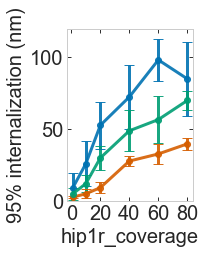

In [51]:
# Select only the time points ≤ maxTime, otherwise "mean" could bias toward simulations with more time points.

# colors = plt.cm.jet(np.linspace(0, 1, len(all_outputs)+1))

colors=plt.cm.cividis(np.linspace(0, 1, len(all_outputs)+1))

fig = plt.figure()

xaxis_log = False

def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    return '%1i' % (x)

# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
fig = plt.figure(figsize=[3.5,4])   
# ax = plt.subplot(111)
ax = fig.add_axes([0.28, 0.2, 0.5, 0.6])



if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)
# ax.yaxis.set_major_formatter(formatter)

solid1_to_max_time = solid_properties_1.loc[lambda solid_properties_1: solid_properties_1['time']<=maxTime]
solid2_to_max_time = solid_properties_2.loc[lambda solid_properties_2: solid_properties_2['time']<=maxTime]
solid3_to_max_time = solid_properties_3.loc[lambda solid_properties_3: solid_properties_3['time']<=maxTime]



# mean_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()
# std_interns_95_by_parameter  = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()
# count of number time points that have a value for 'internalization_95thpercentile_to_set_time', divided by number time points
# nb_runs_interns_95_by_parameter = solid_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].count()/(maxTime/timestep)

x = param_list_x 
#  to t = 12
# y1 = solid1_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()*1000
# y2 = solid2_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()*1000
# y3 = solid3_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].mean()*1000

# std1 = solid1_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()*1000
# std2 = solid2_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()*1000
# std3 = solid3_to_max_time.groupby(property_groups)['internalization_95thpercentile_to_set_time'].std()*1000

#  to last time point
y1 = solid1_to_max_time.groupby(property_groups)['internalization_95thpercentile'].mean()*1000
y2 = solid2_to_max_time.groupby(property_groups)['internalization_95thpercentile'].mean()*1000
y3 = solid3_to_max_time.groupby(property_groups)['internalization_95thpercentile'].mean()*1000

std1 = solid1_to_max_time.groupby(property_groups)['internalization_95thpercentile'].std()*1000
std2 = solid2_to_max_time.groupby(property_groups)['internalization_95thpercentile'].std()*1000
std3 = solid3_to_max_time.groupby(property_groups)['internalization_95thpercentile'].std()*1000



# plot_max = np.max(y1 + std1) +20
# plot_min = np.min(means - stds)*1000

plt.xlabel(config_groups[0])
plt.ylabel('Internalization \n (95th percentile) (nm)')

# plt.figure(figsize=[4,4])   
# ax = plt.subplot(111)

if xaxis_log == True:
    ax.set_xscale('log')

    formatter = plt.FuncFormatter(log_10_product)
    ax.xaxis.set_major_formatter(formatter)
  
    
# ax.errorbar(x,y1,std1, fmt='o-', linewidth=3, color = colors[1])
# ax.errorbar(x,y2,std2, fmt='o-', linewidth=3, color = colors[2])
# ax.errorbar(x,y3,std3, fmt='o-', linewidth=3, color = colors[3])

ax.errorbar(x,y1,std1, fmt='o-', linewidth=3, color=c1, alpha=0.9)
ax.errorbar(x,y2,std2, fmt='o-', linewidth=3, color=c2, alpha=0.9)
ax.errorbar(x,y3,std3, fmt='o-', linewidth=3, color=c3, alpha=0.9)

plt.xlabel(config_groups[0])
plt.ylabel('95% internalization (nm)')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([0, 120])

plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.xticks([0,20,40,60,80])

# ax.get_xaxis().get_major_formatter().labelOnlyBase = False

if 'actin_rigidity'in config_groups[0]:
    plt.xlabel('Actin persistence length (µm)')   

if 'arp2_area' in config_groups[0]:
    plt.xlabel('Arp2/3 density \n (molecules/µm^2)')

# plt.tight_layout()

if save_figures == 'yes':
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_mult_params.png')
    plt.savefig(working_dir+'figures/'+pref+'_internalization95_vs_' +config_groups[0]+ '_mult_params.pdf')


